# Mosquito Bites Project

In [1]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

# 1. Introduction

In this project we will test the association found in the research article, *Beer Consumption Increases Human Attractiveness to Malaria Mosquitoes*, published by Thierry Lefèvre and collaborators in 2010. In this article, they study whether beer consumption could lead to more mosquitos bites. 

The experiment used 43 health adult males with 25 of them being randomly assigned to drink beer and 18 to drink water. They tested each volunteer twice: first without consuming anything and later after 15 minutes of drinking 1 liter of beer/water.   

For this project we have data only for the number of bites after the consumption of either beer or water. Thus, we will check if people who drink beer are more likely to be bitten than those who drink water.
 
 http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0009546

# 2. The Data

The data consists of a *csv* file (mosquitos_data.csv) with the columns:

|Variable | Definition |
|---------|------------|
|**Response**  |	Number of mosquito bites |
|**Treatment** |	Type of beverage         |

In [2]:
import pandas as pd
from pandas import Series,DataFrame
from pylab import *
import numpy as np
from numpy import nan as NA
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import sklearn as skl
import math
import random

In [3]:
# Read the file mosquitos_data.csv and convert it into a data frame. 
df = pd.read_csv('mosquitos_data.csv')
df.head(10)

,Response,Treatment
0,27,Beer
1,20,Beer
2,21,Beer
3,26,Beer
4,27,Beer
5,31,Beer
6,24,Beer
7,21,Beer
8,20,Beer
9,19,Beer


# 3. Exploratory Analysis

 We will start by looking at the distribution of bites for each group.

In [4]:
# Separating each Group:
b   = df.loc[:][df.Treatment=='Beer']  
w = df.loc[:][df.Treatment=='Water']  

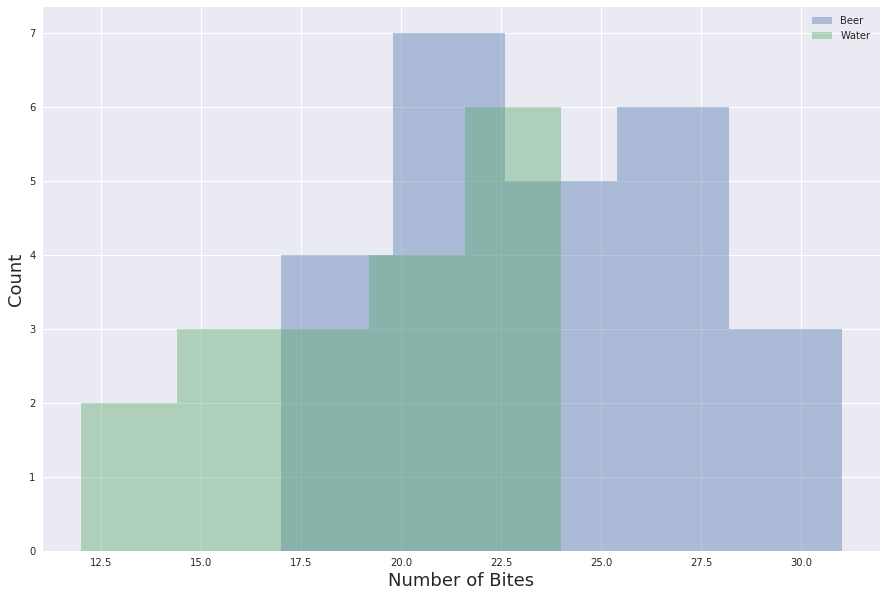

In [5]:
# We will plot the histogram using seaborn.
f, ax = plt.subplots(figsize=(15, 10))

sns.distplot(b.Response, bins=5,kde=False,label="Beer")
sns.distplot(w.Response,bins=5, kde=False,color='g',label="Water")
plt.xlabel('Number of Bites', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend()

The first thing that can be noticed in the Figure above is difference between the range of number of bites for each group. While those drinking water could get as few as 12 bites, beer drinkers were bitten at least 16 times, i.e. 30% more. Similar behaviour can be seen for the maximum number of bites: while people drinking water were bitten at most 24 times, people drinking beer were bitten as many as 30 times (around 30% larger as well). 

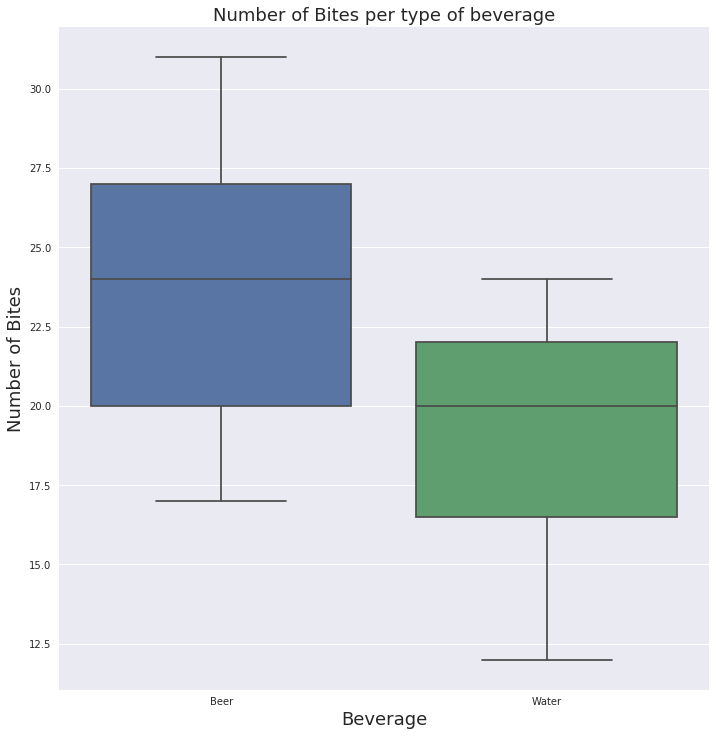

In [6]:
# Box plot with the number of bites per treatment
sns.factorplot('Treatment','Response',data=df,kind='box',size=10)
plt.xlabel('Beverage', fontsize=18)
plt.ylabel('Number of Bites', fontsize=18)
plt.title('Number of Bites per type of beverage', fontsize=18)
plt.legend()
plt.show()

The first thing to be noticed in the Figure above is that the median number of bites (represented by the black horizontal lines insides the boxes) are lower for the group drinking water (~20) than for the group drinking beer (~24). In addition, the interquartile range (represented by the box size) of the water group is lower than that of the beer group, which means that the dispersion in the number of bites is smaller for the water group. These differences could be perceived as an indication that there is an association between beer consumption and attractiveness to mosquitos. 

The upper and lower bars in the Figure above represents the maximum and minimum values, respectively. The Figure shows that while people in the beer group were bitten at least approximately 16 times, people in the water group were bitten as little as ~12 times. In addition, the maximum amount of times a person in the water group was bitten was ~24 times, which is very similar to the median value for the beer group and smaller than the maximum value for the beer group (~31). This behaviour strengths the argument that there is an association between beer consumption and attractiveness to mosquitos, since people in the water group appear to be less likely to be bitten. 

In [7]:
# Using pivot tables to calculate the median, mean, 
# and standard deviation for each group
df.pivot_table(index='Treatment',
             values='Response', aggfunc={'median','mean','std'})

,mean,median,std
Treatment,,,
Beer,23.600000,24,4.133199
Water,19.222222,20,3.671120


# 4. Testing the robustness of the difference between the two groups

We will check whether the difference between the average number of bites for the beer and water groups is real if it occurred by chance. 

### 4.1 Random Permutation

In this first part we will use random permutation to swap elements between the two groups and recalculate the means. 

The Figure below ilustrastes the technique we will apply. The box in the upper left side contains the number of bites for each person who drank beer and the box in the upper right side contains the number fo bites for the water group. For each group the mean value was initially calculated. As shown above, the difference between this two means is 4.38. 

For the random permutation test, we take **n** random elements (in the example below, 5) from each group and re-assign them to the other group.A new mean is, then, calculated for the 2 new beer and water groups. We will do this process at least 10 thousand times in order to check the probability that the initial mean, 4.38, occurred by chance. 

There are 18 people who drank water in the experiment. For this reason, in our first calculation we will swap a random number, between 1 and 18, of elements for each iteration. 

![title](beer_water_perm.jpg)

In [8]:
diff_a=[]
for i in range(0,10000):
    per=random.randint(1,18) 
    # Randomly select k elements from the water group
    indw=random.sample(list(df.loc[:][df.Treatment=='Water'].index),k=per)
    # Randomly select k elements from the beer group
    indb=random.sample(list(df.loc[:][df.Treatment=='Beer'].index),k=per)
    df2=df.copy()
    # Swap the labels
    df2.Treatment.iloc[indw]='Beer'
    df2.Treatment.iloc[indb]='Water'
    # Calculate the difference between the means
    diff=mean(df2.loc[:][df2.Treatment=='Beer'])-mean(df2.loc[:][df2.Treatment=='Water'])
    # Add the difference to a list
    diff_a.append(diff.Response)
#    print(i)

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


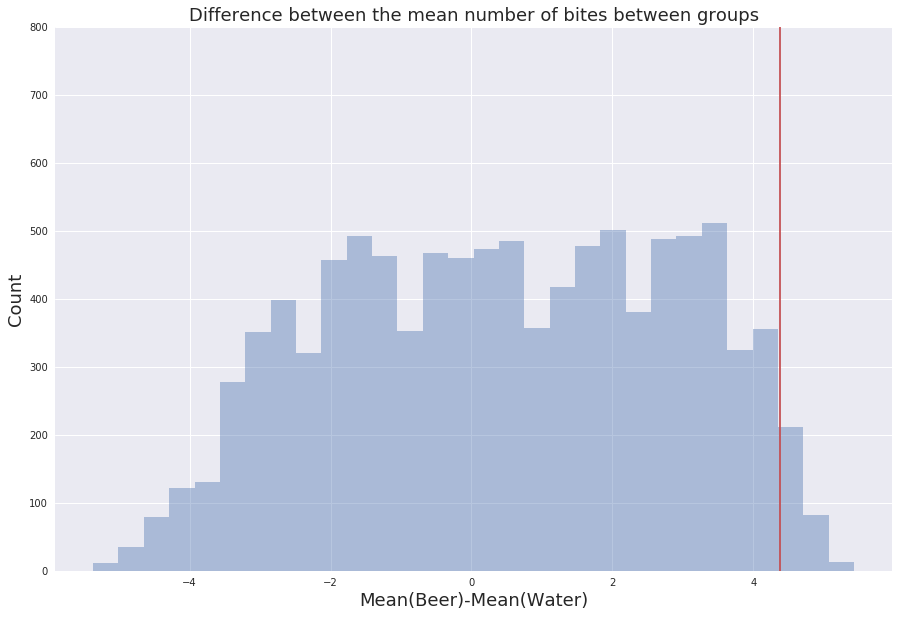

In [9]:
# Plotting the distribution of difference between means:
diff_o=mean(df.loc[:][df.Treatment=='Beer'])-mean(df.loc[:][df.Treatment=='Water'])
yy=[0.0,800.0]
xx=[diff_o,diff_o]
f, ax = plt.subplots(figsize=(15, 10))
sns.distplot(diff_a, bins=30, kde=False)
plt.plot(xx,yy,'r')
ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('Mean(Beer)-Mean(Water)',fontsize=18)
ax.set_title('Difference between the mean number of bites between groups',fontsize=18)
ax.set_ylim(0,800)
plt.show()

The Figure above shows the distribution of differences calculated for 10000 iterations of random permutation performed on the mosquito bites data. The red line shows the difference between the mean values for the beer and water groups for the original data. As it can be seen from this Figure, the value in red is not achieved by the majority (~98% of the sample) of the mixed sample, showing that the difference between means for the original data did not happen by chance. The large spread in the distribution is related do the random selection of the number of observations being swapped in each iteration. 

In [10]:
# Calculating the fraction of observations larger than the original difference between means
per_r  = pd.Series(diff_a)
pval_r = per_r[per_r >= 4.38]
len(pval_r)/len(per_r)


0.0247

#### 4.1.1 Choosing fixed values for the number of swapped elements

In this part we will perform the same technique performed before, but for a fixed number of swapped elements.

In [11]:
# Defining function
def perm(data,per,ar_ou):
    for i in range(0,10000):
    
        # Randomly select k elements from the water group
        indw=random.sample(list(data.loc[:][data.Treatment=='Water'].index),k=per)
        # Randomly select k elements from the beer group
        indb=random.sample(list(data.loc[:][data.Treatment=='Beer'].index),k=per)
        df2=data.copy()
        # Swap the labels
        df2.Treatment.iloc[indw]='Beer'
        df2.Treatment.iloc[indb]='Water'
        # Calculate the difference between the means
        diff=mean(df2.loc[:][df2.Treatment=='Beer'])-mean(df2.loc[:][df2.Treatment=='Water'])
        # Add the difference to a list
        ar_ou.append(diff.Response)
#        print(i)

Swapping **two** elements:

In [12]:
# Call the function for k=2
diff_2=[]
perm(df,2,diff_2)

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


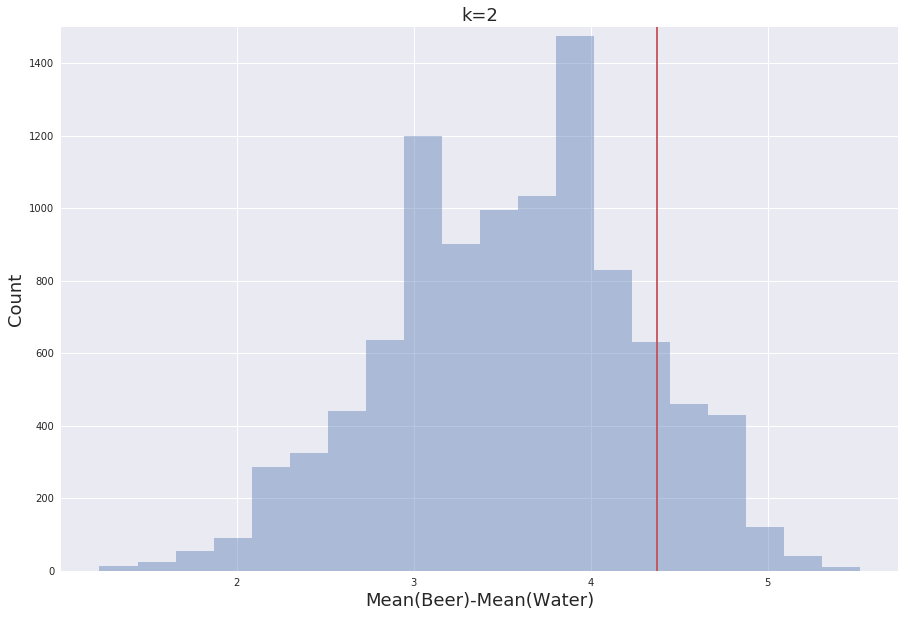

In [13]:
yy=[0.0,1500.0]
xx=[diff_o,diff_o]
f, ax = plt.subplots(figsize=(15, 10))
sns.distplot(diff_2, bins=20, kde=False)
plt.plot(xx,yy,'r')
ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('Mean(Beer)-Mean(Water)',fontsize=18)
ax.set_title('k=2',fontsize=18)
ax.set_ylim(0,1500)
plt.show()

In [14]:
# Calculating the fraction of observations larger than the original difference between means
per_2  = pd.Series(diff_2)
pval_2 = per_2[per_2 >= 4.38]
len(pval_2)/len(per_2)


0.1061

The Figure above shows 10000 iterations swaping only two observations. Differently from the previous case, when only two elements are swaped, the original value falls within the 2 sigma region. It is clear that swaping only 2 elements does not change significantly the nature of the two groups. Thus, a larger amount of permutations is necessary to test if the original mean is real or happens by chance.

Swapping **nine** elements:

In [15]:
# Call the function for k=9
diff_9=[]
perm(df,9,diff_9)

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


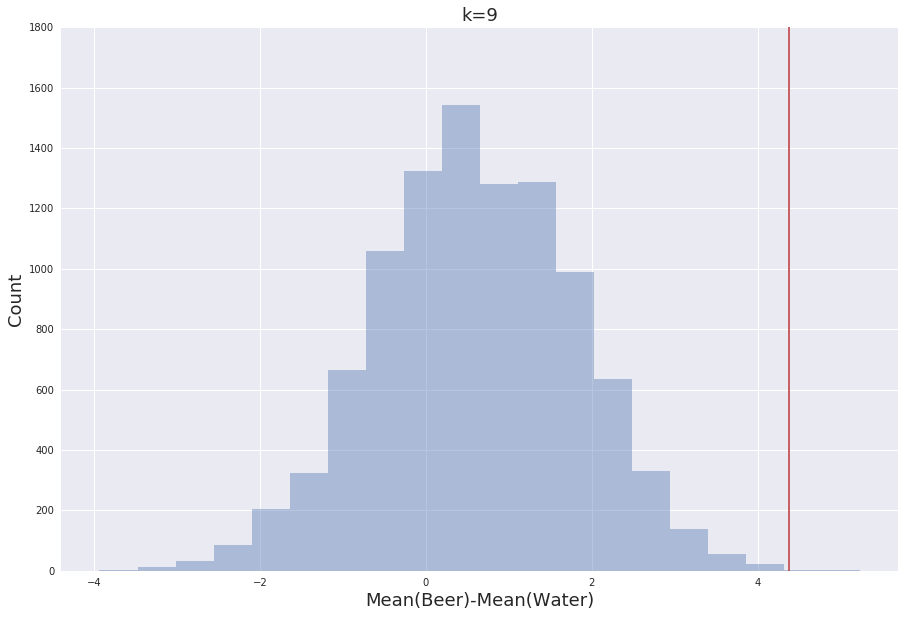

In [16]:
yy=[0.0,1800.0]
xx=[diff_o,diff_o]
f, ax = plt.subplots(figsize=(15, 10))
sns.distplot(diff_9, bins=20, kde=False)
plt.plot(xx,yy,'r')
ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('Mean(Beer)-Mean(Water)',fontsize=18)
ax.set_title('k=9',fontsize=18)
ax.set_ylim(0,1800)
plt.show()

In [17]:
# Calculating the fraction of observations larger than the original difference between means
per_9  = pd.Series(diff_9)
pval_9 = per_9[per_9 >= 4.38]
len(pval_9)/len(per_9)

0.0006

The Figure above shows the distribution of means calculated for 10000 runs of random permutation technique when swaping 9 observations. The red line shows the difference between the mean values for the beer and water groups for the original data. As it can be seen from this Figure, the value in red is not achieved by the vast majority (>99.9%) of the mixed sample, showing that the difference between mean for the original data is real. 

This p-value is very similar to the value if a t-test is applied. 

In order to perform a t-test we will first formulate the null and alternative hypothesis.

H0: There is no difference between the means.

HA: There is a difference between the means and it is larger than 0.

The t-score can be estimated by:
$$t=\frac{4.38-0}{1.95}=3.66$$

where 4.38 is the difference between the two means and 1.95 is the standard error calculated from

$$SE=\sqrt{\frac{\sigma_{1}^{2}}{n_{1}}+\frac{\sigma_{2}^{2}}{n_{2}}}$$

From t-probability table and using df=17 below we can see that the p-value is between 0.0005 and 0.001 which is very similar to what we found in the simulation above.

![title](t_table_s.jpg)

The 95% confidence interval for the mean is [2.30,6.43].

Swaping **All** elements:

In [18]:
# Call the function for k=18
diff_18=[]
perm(df,18,diff_18)

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


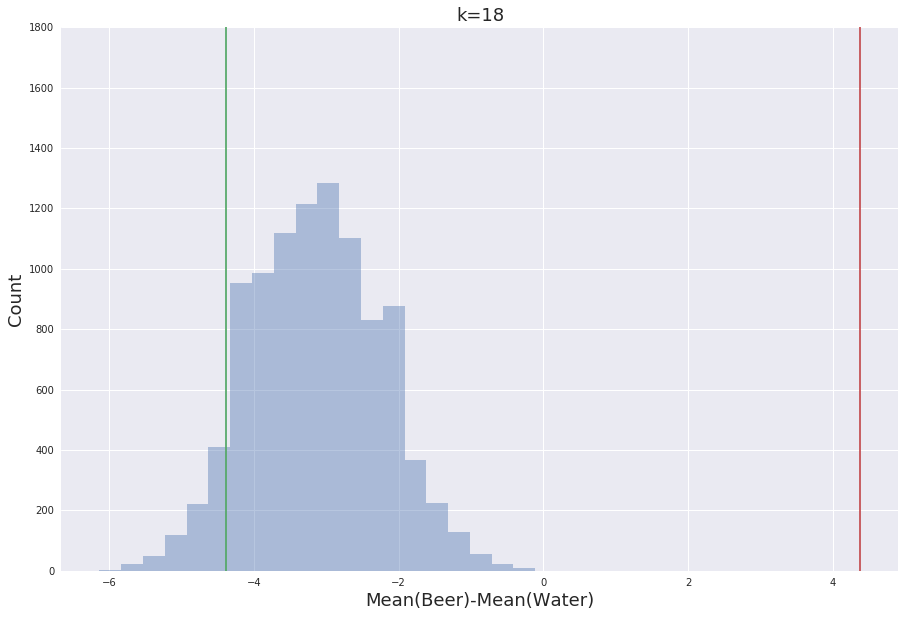

In [19]:
yy=[0.0,1800.0]
xx=[diff_o,diff_o]
f, ax = plt.subplots(figsize=(15, 10))
sns.distplot(diff_18, bins=20, kde=False)
plt.plot(xx,yy,'r')
plt.plot([-4.38,-4.38],yy,'g')
ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('Mean(Beer)-Mean(Water)',fontsize=18)
ax.set_title('k=18',fontsize=18)
ax.set_ylim(0,1800)
plt.show()

The Figure above shows 10000 iterations of random permutation between the two samples when swaping all elements of the *Water* sample. Swaping all elements has a similar effect as swaping only 2 elements (the nature of the groups is not significantly changed), except that, in this case, the distributions of differences is shifted to the negative region.  

#### 4.1.2 Shuffle the sample and split into two groups

In this test we will group the entire sample in one with 43 elements, shuffle this sample and separate in one group of 25 elements and another of 18.

In [20]:
diff_sh=[]
for i in range(0,10000):
    df2=df.copy()     
    nt=random.sample(list(df2.Response),k=len(df2)) 
    diff=mean(nt[0:25])-mean(nt[24:43])
    # Add the difference to a list
    diff_sh.append(diff)
#    print(i)

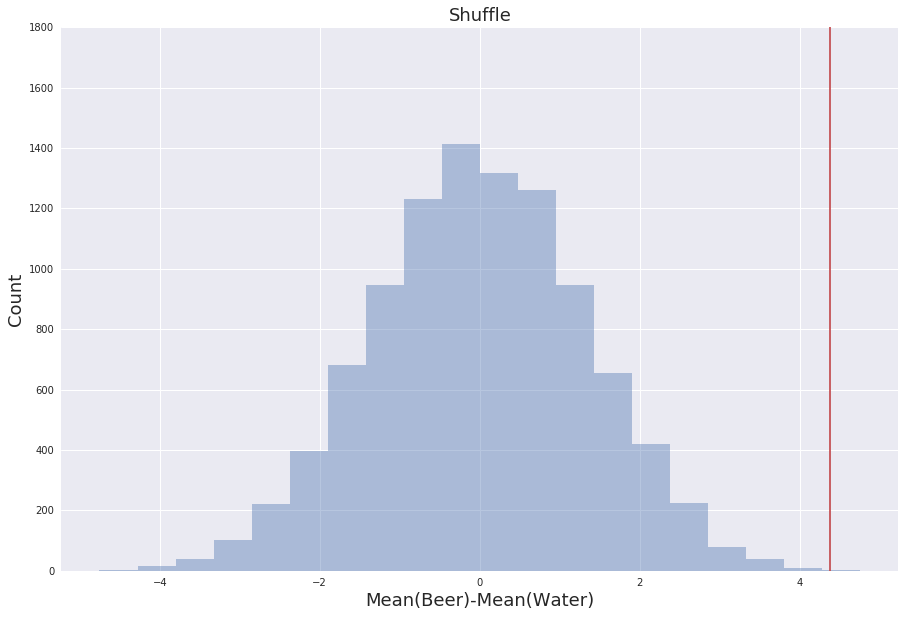

In [21]:
yy=[0.0,1800.0]
xx=[diff_o,diff_o]
f, ax = plt.subplots(figsize=(15, 10))
sns.distplot(diff_sh, bins=20, kde=False)
plt.plot(xx,yy,'r')
ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('Mean(Beer)-Mean(Water)',fontsize=18)
ax.set_title('Shuffle',fontsize=18)
ax.set_ylim(0,1800)
plt.show()

In [22]:
# Calculating the fraction of observations larger than the original difference between means
per_sh  = pd.Series(diff_sh)
pval_sh = per_sh[per_sh >= 4.38]
len(pval_sh)/len(per_sh)

0.0002

As seen in the permutation case, a simple shuffle and division into two groups shows that the chance of this difference between means to happen by chance is really small. 

### 4.2 Bootstrapping

For the sake of completion we will test the bootstrapping technique in which the sampling has replacement.

In [23]:
diff_bt=[]
for i in range(0,10000):
    df2=df.copy()     
    indb=random.choices(list(df[0:25].index),k=25) 
    indw=random.choices(list(df[25:43].index),k=18) 
    df2.Treatment.iloc[indw]='Beer'
    df2.Treatment.iloc[indb]='Water'
    # Calculate the difference between the means
    diff=mean(df2.loc[:][df2.Treatment=='Beer'])-mean(df2.loc[:][df2.Treatment=='Water'])
    # Add the difference to a list
    diff_bt.append(diff.Response)
#    print(i)

/home/monique/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


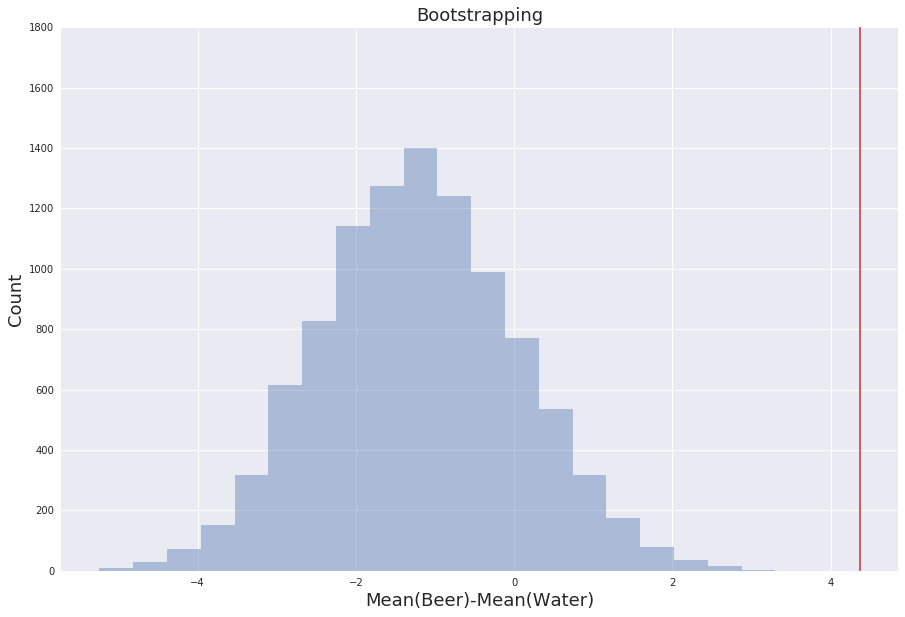

In [24]:
yy=[0.0,1800.0]
xx=[diff_o,diff_o]
f, ax = plt.subplots(figsize=(15, 10))
sns.distplot(diff_bt, bins=20, kde=False)
plt.plot(xx,yy,'r')
ax.set_ylabel('Count',fontsize=18)
ax.set_xlabel('Mean(Beer)-Mean(Water)',fontsize=18)
ax.set_title('Bootstrapping',fontsize=18)
ax.set_ylim(0,1800)
plt.show()

In [25]:
# Calculating the fraction of observations larger than the original difference between means
per_bt  = pd.Series(diff_bt)
pval_bt = per_sh[per_bt >= 4.38]
len(pval_bt)/len(per_bt)

0.0

The boostrapping approach confirms what all others did: The difference between the means is real!

# 5. Conclusion

In this project we have used the data from the 2010 article *Beer Consumption Increases Human Attractiveness to Malaria Mosquitoes* to test the hypothesis that people who drink beer are more attractive to mosquitoes. 

The sample consists of 43 individuals randomly divided in two groups: one that consumed beer (25 individuals) and one that consumed water (18 individuals).

The exploratory analysis showed that the group that drank beer has, on average, 4.38 more bites than the other group. In addition, while on one hand a person in the water group has been bitten at most 24 times and in the beer group 31 times, on the other hand, a person in the beer group has been bitten at least 16 times and in the water group as little as 12 times. 

This simple exploratory analysis leads to the conclusion that, indeed, beer consumption increases attactiveness to mosquitoes. 

In order to test whether this conclusion is true or that the difference of 4.38 between the average number of bites found happened by chance, several simulations were performed. 

First, 10000 random permutation between individuals of the two groups were performed and the result showed that, even if a random number of elements were permuted each time, the chance of the value 4.38 appearing by chance is really small (section 4.1 and subsection 4.1.1).

Another test consisted in shuffling the entire sample and, then, dividing it in 2 groups of 25 and 18 samples. Again, the change of the difference between the means to be equal to 4.38 is really small, with p-value equal to 0.0002 (subsection 4.1.2).

The third test was boostrapping. In the boostrapping case, 25 elements, with replacement, are drawn from the beer group and 18 elements, with replacement, are drawn from the water group. Again, we find that a difference equal to 4.38 almost never happens in a randomly selected sample (section 4.2). 

We also used the classic t-test to find the p-value of the alternative hypothesis (diff > 0) and the 95% confidence level for the difference between the average values. As seen in subsection 4.1.1, the p-value of the t-test under the null hypothesis that the difference between the means is zero falls between 0.0005 and 0.001 (much smaller than 0.05). This confirms that the null hypothesis can be rejected. Furthermore, the 95% confidence level for the true value of the difference between the means is [2.30,6.34].

So, there you go, if you drink beer and are travelling to a place where there are Malaria mosquitoes do not forget to vaccinate and use insect repellent, because your chances of being bitten is larger. ;)
